# <center>**MDI 721- TP3 : Sélection de variables**

## **Contexte** 

<p style="text-align: justify"> <br>
Nous travaillons sur la base de données diabetes de python. La base initiale comporte
n = 442 patients et p = 10 covariables. La variable Y à expliquer est un score correspondant à
l’évolution de la maladie. Pour s’amuser, un robot malicieux a contaminé le jeu de données en
y ajoutant 200 variables explicatives inappropriées. Ensuite, non-content d’avoir déjà perverti
notre jeu de données, il a volontairement mélangé les variables entre elle de façon aléatoire. Bien
entendu le robot a ensuite pris soin d’effacer toute trace de son acte crapuleux si bien que nous
ne connaissons pas les variables pertinentes. La nouvelle base de données comporte n = 442
patients et p = 210 covariables, notés X. </br>
<p> <b>Objectif : </b> Sélectionner les variables les plus pertinentes grâce aux outils statistiques comme le LASSO, le forward etc... </p>

In [2]:
#importation des librairies usuelles
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#importation des modules de sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.datasets import make_regression

In [4]:
#importation des données
df:pd.DataFrame = pd.read_csv("data_dm3.csv",header= None)

## **Q.1 : Description du DataFrame**

In [5]:
print(" : ".join(["Nombre d'observations",str(df.shape[0]),]))
print(" : ".join(["Nombre de variables",str(df.shape[1]-1),]))

Nombre d'observations : 442
Nombre de variables : 210


## **Q.2 : Description du DataFrame**

In [6]:
df.describe().round(3)

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,...,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,...,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,152.133
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,...,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001,77.093
min,-3.149,-2.863,-3.058,-2.857,-3.102,-2.782,-2.825,-3.627,-2.834,-2.696,...,-3.059,-3.207,-2.585,-3.562,-3.168,-2.751,-3.029,-2.675,-2.918,25.000
25%,-0.671,-0.713,-0.716,-0.672,-0.673,-0.695,-0.699,-0.639,-0.667,-0.693,...,-0.689,-0.579,-0.628,-0.619,-0.736,-0.637,-0.647,-0.703,-0.638,87.000
50%,0.038,0.062,0.047,0.000,-0.006,-0.013,-0.048,0.040,0.001,0.036,...,-0.030,0.025,-0.022,-0.006,0.008,-0.003,0.024,-0.042,-0.081,140.500
75%,0.675,0.624,0.698,0.688,0.703,0.716,0.720,0.579,0.630,0.663,...,0.667,0.668,0.599,0.741,0.700,0.644,0.631,0.693,0.725,211.500
max,2.547,2.567,2.966,3.058,3.174,3.138,3.199,3.617,3.099,3.033,...,2.677,2.807,3.255,2.812,2.839,3.351,2.734,3.638,2.710,346.000


In [7]:
print("Somme des moyennes des variables explicatives :", abs(df[range(210)].describe().loc["mean"].sum().round()))
print("Somme des moyennes des variables explicatives :", abs(df[range(210)].describe().loc["std"].sum().round()))

Somme des moyennes des variables explicatives : 0.0
Somme des moyennes des variables explicatives : 210.0


$$\sum_{i=0}^{p=209} mean_{(i)} = 0$$ 

$$\sum_{i=0}^{p=209} \frac{std_i}{p-i+1} = 1$$ 

<b>Les variables explicatives sont donc centrées et normées.</b>

In [8]:
df[210].describe().loc["mean"]

152.13348416289594

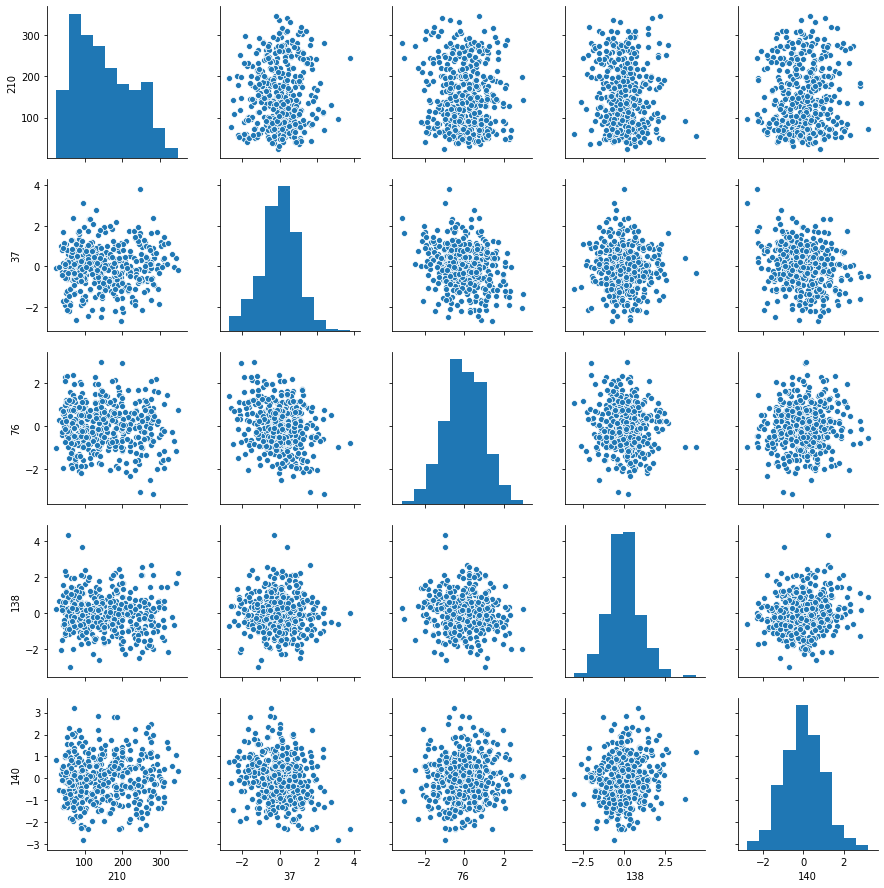

In [9]:
#ajouter titres
sns.pairplot(data=df[np.append(210,(np.random.randint(0,210,4)))])

Nous avons ici sélectionné 4 variables pseudo-aléatoirement ainsi que la variable à expliquer. </br>
Nous avons ensuite tracé chaque variable en fonction des autres pour observer leur variations jointes </br>
On peut ici faire deux observations :
<ol>
    <li>Il ne semble pas y avoir de relation entre les variables sélectionnées. On peut donc en conclure qu'il s'agit des variables du robot farceur que nous nomerons <b>JeanJass </b>.</li>
        <li> Les variables de JeanJass semblent être distribuées selon une loi normale.</li>
</ol>

In [10]:
print(" : ".join(["Moyenne de y",str(df[210].describe().loc["mean"])]))
print(" : ".join(["Ecart type de y",str(df[210].describe().loc["mean"])]))

Moyenne de y : 152.13348416289594
Ecart type de y : 152.13348416289594


https://seaborn.pydata.org/examples/many_pairwise_correlations.html

## **Q.3 : Constitution des échantillons d'entraînement et de test**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df[range(0,210)], df[210], test_size=0.20, random_state=0)

In [12]:
print("\n","Nombre d'observations de X_train : ",X_train.shape[0], "soit",str(round(353/442*100))+" %", " du DataFrame.","\n","Nombre d'observations de X_test" ,X_test.shape[0],"soit",str(round(89/442*100))+" %", " du DataFrame.")


 Nombre d'observations de X_train :  353 soit 80 %  du DataFrame. 
 Nombre d'observations de X_test 89 soit 20 %  du DataFrame.


<b>L'échantillon ayant été partillonné, les valeurs ne sont donc plus centrées.</b>

## **Q.4 : Matrice de covariance de X_train et valeurs propres associées**

In [13]:
X_train_scaled:pd.DataFrame = pd.DataFrame(data=scale(X_train, axis=0, with_mean=True, with_std=False))

On définit $X\_train\_cov $ la matrice de covariance du DataFrame $X\_train$.

In [14]:
X_train_cov:pd.DataFrame = X_train_scaled.cov()

In [15]:
ipca = PCA(n_components=209)
model_PCA =  ipca.fit(X_train_cov)
#ratio_variance = model_PCA.explained_variance_ratio_ 
eighenvalues = model_PCA.singular_values_

Text(0.5, 1.0, 'Décroissance des valeurs propres de la matrice de covariance')

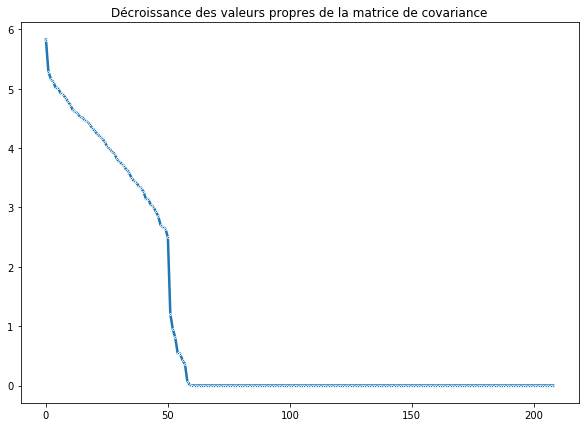

In [16]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data=eighenvalues,marker="o",markersize=2, linewidth=2.5)
plt.title("Décroissance des valeurs propres de la matrice de covariance")

On remarque qu'aux alentours de la 60ème valeurs propres, toutes les valeurs propres ont une valeur proche de zéro. </br>
On peut donc dire que l'ensemble des variables explicatives correspondantes ne sont pas des variables explicatives pour notre problème. On peut donc ne pas les prendre en compte.


## **Q.5 : Comparaison des méthodes MCO classique et APC avant le MCO**

### Q.5.1. Méthode des MCO classique

In [17]:
mco = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, y_train)

#reg.score(Xtild2, y_train)
print("intercept sans ALS : " + str(mco.intercept_) )
predictions_mco = mco.predict(X_test)
coefs_mco = np.sort(mco.coef_)

intercept sans ALS : 153.16873229461757


Text(0.5, 1.0, 'Coeffcients ordonnés issus de la régression linéaire simple ')

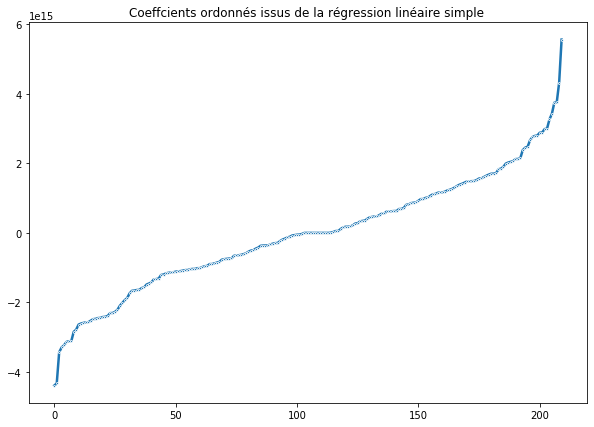

In [18]:
fig = plt.figure(figsize = (10, 7))
sns.lineplot(data=coefs_mco, marker='o',markersize=2, linewidth=2.5)
plt.title("Coeffcients ordonnés issus de la régression linéaire simple ")

## 5.2. Méthode APC avant MCO

On définit $\tilde{X} = {X\_train}\times{V_{(1:60)}} $ correspondant à la matrix $X\_train$ exprimée dans la base des vecteurs des 60 premières valeurs propres.

In [19]:
Xtild = PCA(n_components=60).fit_transform(X_train)
print("Taille de la matrice Xtilde :", Xtild.shape)

Taille de la matrice Xtilde : (353, 60)


In [20]:
Xtild_test = PCA(n_components=60).fit(X_train).transform(X_test)
print("Taille de la matrice Xtilde_test :", Xtild_test.shape)

Taille de la matrice Xtilde_test : (89, 60)


In [21]:
pca_ols = LinearRegression(fit_intercept=True, normalize=True).fit(Xtild, y_train)

#reg.score(Xtild2, y_train)
predictions_pca = pca_ols.predict(Xtild_test)
print("intercept pca before ols : " + str(pca_ols.intercept_) )
coefs_pca_ols = np.sort(pca_ols.coef_)

intercept pca before ols : 151.60623229461757


Text(0.5, 1.0, 'Coeffcients ordonnés issus de la régression linéaire avec une analyse par composante principale ')

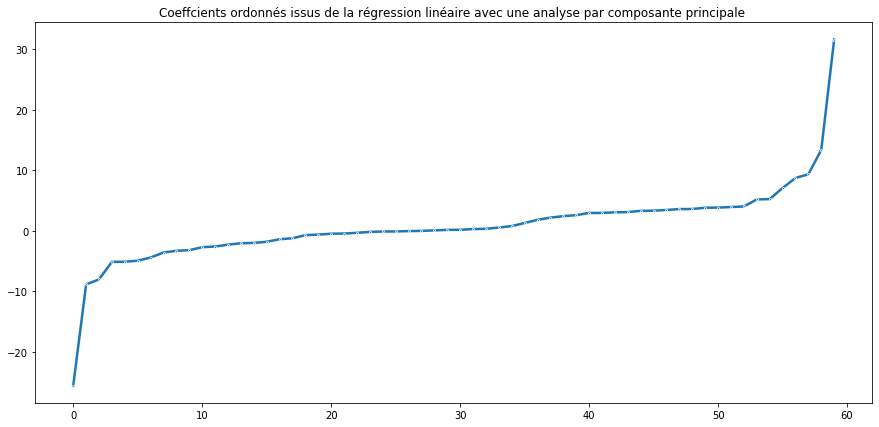

In [22]:
fig = plt.figure(figsize = (15, 7))
sns.lineplot(data=coefs_pca_ols, marker='o',markersize=2, linewidth=2.5)
plt.title("Coeffcients ordonnés issus de la régression linéaire avec une analyse par composante principale ")


# Q.6 : Comparaison des deux modèles précédents

In [23]:
print("La moyenne de y_train est environ égale à ", round(y_train.mean(),2))

La moyenne de y_train est environ égale à  151.61


In [24]:
intercept_mco:float = mco.intercept_ 
intercept_pca_ols:float= pca_ols.intercept_

diff_intercepts = intercept_pca_ols - intercept_mco
print("Différence entre les intercepts :", diff_intercepts)

Différence entre les intercepts : -1.5625


On remarque que les 2 intercepts ne sont pas égales ce qui n'est pas surpenant. </br>
En effet, les deux régressions linéaires linéaires ne sont pas effectuées sur les mêmes jeux de données </br>
On peut cependant observer que leurs valeurs respectives sont du même ordre et même proches. L'ACP semble donc être une méthode cohérente de sélection de variables pour le moment...

In [25]:
Xtild_scaled = pd.DataFrame(data=scale(Xtild, axis=0, with_mean=True, with_std=True))
Xtild_test_scaled = pd.DataFrame(data=scale(Xtild_test, axis=0, with_mean=True, with_std=True))

In [26]:
pca_ols_scaled = LinearRegression(fit_intercept=True, normalize=True).fit(Xtild_scaled, y_train)

#reg.score(Xtild2, y_train)
predictions_PCA_scaled = pca_ols.predict(Xtild_test_scaled)
print("intercept pca scaled before ols : " + str(pca_ols_scaled.intercept_) )
print(pca_ols_scaled.intercept_ - y_train.mean())

intercept pca scaled before ols : 151.60623229461757
0.0


<b>On trouve bien qu'après OLS avec des variables centrées réduites, l'intercept est égale à la moyenne des valeurs de $Y\_train$</b>

## Q.7 : Comparaison des résidus pour les deux méthodes utilisées

### 7.1 : Méthode MCO classique

In [27]:
residus_mco = y_test - predictions_mco

R² mco : -0.08034743280688006
Risque prédictif mco : 28759.32229725707
Erreur mco : 59.517398228383286


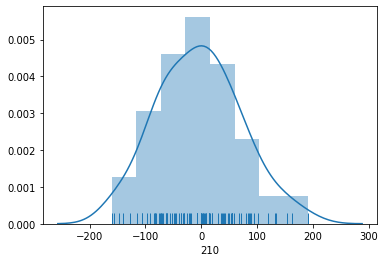

In [28]:
sns.distplot(residus_mco, rug=True)
print("R² mco : " + str(mco.score(X_test, y_test)))
print("Risque prédictif mco : " + str(np.mean(predictions_mco**2)))
print("Erreur mco : " + str(mean_absolute_error(y_test, predictions_mco)))

In [29]:
residus_pca = y_test - predictions_pca

R² ACP : 0.2728192990176276
Risque prédictif ACP : 3728.929571836802
Erreur ACP : 48.330828912819484


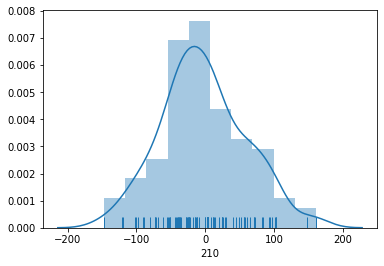

In [30]:
sns.distplot(residus_pca, rug=True)
print("R² ACP : " + str(pca_ols.score(Xtild_test, y_test)))
print("Risque prédictif ACP : " + str(np.mean(residus_pca**2)))
print("Erreur ACP : " + str(mean_absolute_error(y_test, predictions_pca)))

## Q.8 : Méthode du forward

In [31]:
def forward():
    
    features_selected = []
    X = np.asarray(X_train)    
    residus = np.asarray(y_train)
    t_stat_plot = dict()
    p_value_plot = dict()
    p_value_selected = dict()
    
    for j in range(1,210):
        
        p_value_list = []
        t_stat_list= []
        coco = []
        
        for i in range(1,X.shape[1]):
            """ if i in features_selected:
                t_stat = 0
                p_value = 2*(stats.t.sf(1-np.abs(t_stat),X.shape[0]-1))
                p_value_list.append(p_value)"""
                
            if i not in features_selected:            

                pca_ols = LinearRegression(fit_intercept=True, normalize=False).fit(X[:,i].reshape(-1,1),residus)

                coefs = pca_ols.coef_[0]
                sigma_carre = (np.linalg.norm(residus - coefs*X[:,i]))**2/(X.shape[0]-1)        

                t_stat = coefs/((sigma_carre*1/(np.dot(X[:,i],np.transpose(X[:,i]))))**(0.5))
                t_stat_list.append(t_stat)
                
                p_value = 2*stats.t.sf(np.abs(t_stat),X.shape[0]-1)
                p_value_list.append(p_value)
                coco.append(i)
    
        index = p_value_list.index(min(p_value_list))
        features_selected.append(coco[index])
        
        t_stat_plot[j] = t_stat_list
        p_value_plot[j] = p_value_list
        
    pval_ols = LinearRegression(fit_intercept=True, normalize=False).fit(X[:,index].reshape(-1,1),residus)
    residus = pval_ols.predict(X[:,index].reshape(-1,1))

    
    return features_selected, t_stat_plot, p_value_plot, p_value_selected 



        
        

In [32]:
features_selected, t_stat_plot, p_value_plot, p_value_selected  = forward()

In [33]:
print("Les variables sélectionnées ordonnées selon leur plus petit p-value sont : ", str(features_selected))

Les variables sélectionnées ordonnées selon leur plus petit p-value sont :  [58, 123, 34, 167, 174, 23, 133, 99, 79, 17, 13, 168, 43, 172, 27, 131, 154, 112, 130, 49, 138, 127, 121, 98, 176, 22, 146, 208, 190, 103, 25, 129, 159, 53, 136, 47, 141, 116, 152, 20, 84, 2, 85, 200, 33, 166, 61, 26, 162, 196, 28, 191, 140, 102, 30, 113, 161, 181, 158, 45, 3, 77, 80, 57, 182, 153, 150, 24, 59, 117, 149, 108, 83, 118, 90, 93, 128, 188, 175, 157, 185, 184, 104, 48, 207, 9, 18, 209, 177, 19, 10, 203, 187, 64, 180, 143, 96, 198, 94, 165, 115, 100, 122, 106, 119, 7, 142, 76, 135, 169, 65, 170, 70, 32, 37, 137, 132, 66, 74, 201, 105, 8, 147, 1, 194, 111, 46, 68, 160, 41, 4, 5, 110, 164, 42, 6, 193, 144, 120, 171, 82, 134, 51, 155, 36, 192, 60, 204, 71, 178, 88, 31, 101, 139, 199, 156, 126, 75, 163, 72, 69, 179, 183, 12, 197, 107, 63, 52, 39, 16, 87, 62, 195, 15, 91, 55, 151, 92, 186, 29, 81, 89, 50, 124, 14, 56, 114, 67, 125, 206, 148, 21, 205, 11, 145, 173, 73, 44, 202, 95, 78, 189, 54, 97, 35, 86,

## Q.9 : Critère d'arrêt

Text(0, 0.5, 'valeur de t-stat')

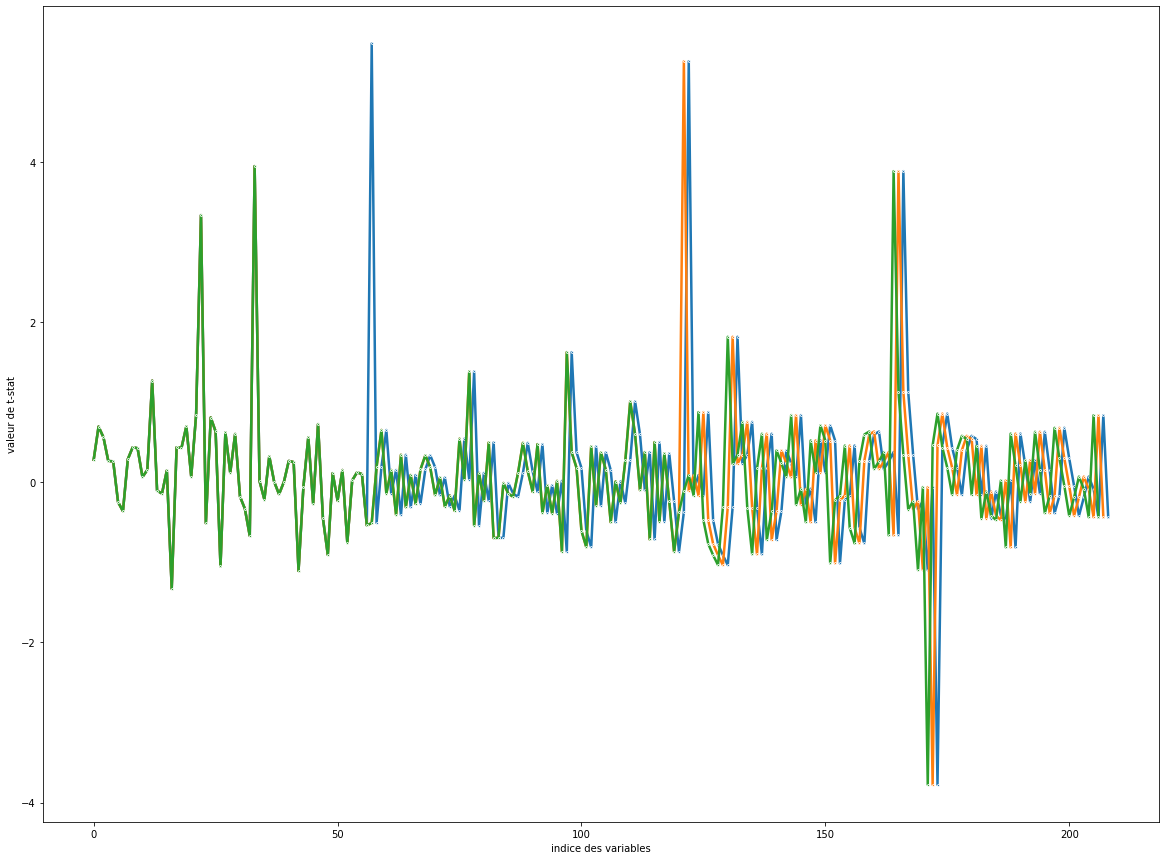

In [34]:
fig = plt.figure(figsize = (20, 15))
sns.lineplot(data=np.array(t_stat_plot[1]), marker='o',markersize=2, linewidth=2.5)
sns.lineplot(data=np.array(t_stat_plot[2]), marker='o',markersize=2, linewidth=2.5)
sns.lineplot(data=np.array(t_stat_plot[3]), marker='o',markersize=2, linewidth=2.5)
plt.xlabel('indice des variables')
plt.ylabel('valeur de t-stat')

On remarque que les 2 premières variables, la t-stat est remise à zéro. Ainsi, elles n'ont plus d'influence dans la suite de notre forward.

In [35]:
def p_value(list):
    result = []
    for i in range(1,len(list)+1):
        result.append(min(p_value_plot[i]))
    return np.array(result)

In [36]:
def critere_arret(list, a):
    critere = a
    return sum(i < a for i in list)

In [37]:
print("En fixant notre critère d'arrêt égal à 0.1, on sélectionne",critere_arret(p_value(features_selected), 0.1)," variables.")

En fixant notre critère d'arrêt égal à 0.1, on sélectionne 7  variables.


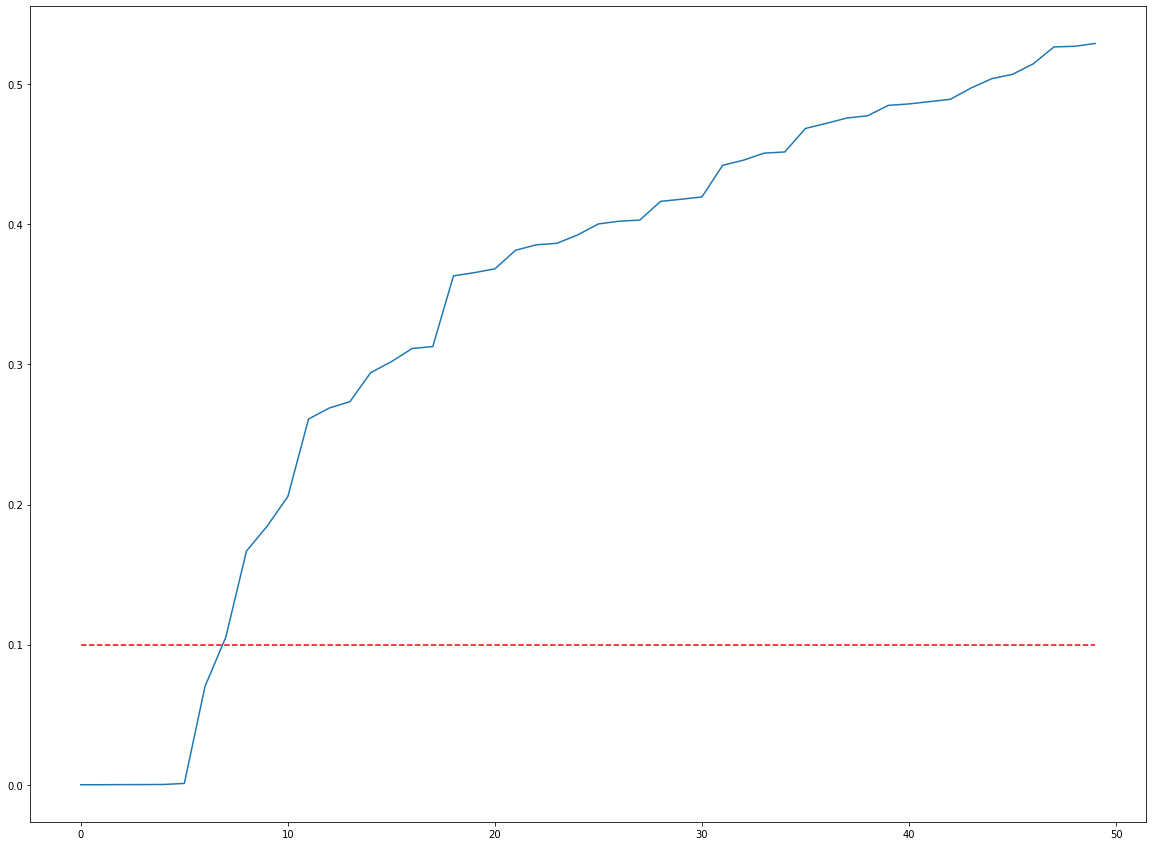

In [38]:
fig = plt.figure(figsize = (20, 15))
sns.lineplot(data=p_value(features_selected[:50]))
horiz_line_data = np.ones((50,1))*0.1
plt.plot(horiz_line_data, 'r--') 

In [39]:
print("Les variables sélectionnées sont : ", features_selected[:8])

Les variables sélectionnées sont :  [58, 123, 34, 167, 174, 23, 133, 99]


## Q.10 : Comparaison du modèle forward aux précédents

In [43]:
y = y_train
X = X_train.iloc[:, features_selected[:7]]

model = LinearRegression(fit_intercept=True, normalize=False).fit(X,y)
pred = model.predict(X_test.iloc[:, features_selected[:7]])
res = y_test - pred

r_predictif = np.mean(res**2)

print("Le risque pédictif du forward est égal à : ",r_predictif)
error = mean_absolute_error(y_test, pred)
print("L'erreur est égale à :",error)


Le risque pédictif du forward est égal à :  3516.4950766583365
L'erreur est égale à : 46.3745937053189


In [44]:
print("RAPPEL")

print("R² mco : " + str(mco.score(X_test, y_test)))
print("Risque prédictif mco : " + str(np.mean(predictions_mco**2)))
print("Erreur mco : " + str(mean_absolute_error(y_test, predictions_mco)))


print("R² ACP : " + str(pca_ols.score(Xtild_test, y_test)))
print("Risque prédictif ACP : " + str(np.mean(residus_pca**2)))
print("Erreur ACP : " + str(mean_absolute_error(y_test, predictions_pca)))


RAPPEL
R² mco : -0.08034743280688006
Risque prédictif mco : 28759.32229725707
Erreur mco : 59.517398228383286
R² ACP : 0.2728192990176276
Risque prédictif ACP : 3728.929571836802
Erreur ACP : 48.330828912819484


Ainsi, on remarque que le risque prédictif de notre forward est entre l'ACP et le MCO. Cependant l'erreur du forward est meilleure car nous nous sommes débarassés de variables non explicatives perturbant la précision de notre modèle. 

## Q.11 : Folds

In [45]:
folds = KFold(n_splits=4)

k = 1
for train_index, test_index in folds.split(X_train):
    print(f"Index utilisé pour le fold n°{k} : \n\nTRAIN: {list(train_index)}, \n\nTEST: {list(test_index)} \n\n")
    k +=1

Index utilisé pour le fold n°1 : 

TRAIN: [89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282

## Q.12 : Ridge

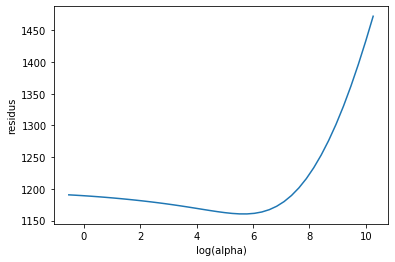

alpha optimum = 55.2061438912436
valeur du risque du test = 1160.4688627739945


In [46]:
def ridge(y_train, X_train, alpha, folds):
    
    liste = []
    
    for i in alpha:
        ridge_model = Ridge(alpha=i)
        sum_res = 0
        for k in range(folds.n_splits):
            train_index = list(list(folds.split(X_train))[k][0])
            test_index = list(list(folds.split(X_train))[k][1])
            
            ridge_reg = ridge_model.fit(X_train.iloc[train_index, :], y_train.iloc[train_index])
            
            res = y_train.iloc[test_index] - ridge_reg.predict(X_train.iloc[test_index, :])

            sum_res += np.sum(res**2)/len(train_index) 

        sum_res = sum_res/folds.n_splits
        liste.append(sum_res)
        
    return(liste)

            
alpha = [1.2**k for k in range(-2, 40)]
liste = ridge(y_train, X_train, alpha, folds)


sns.lineplot(x=np.log2(alpha), y=liste)
plt.xlabel('log(alpha)')
plt.ylabel('residus')
plt.show()

print(f"alpha optimum = {alpha[np.argmin(liste)]}")
print(f"valeur du risque du test = {min(liste)}")

## Q.13 : LASSO

In [47]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df[range(0,210)], df[210], test_size=0.20, random_state=0)

In [48]:
#X_train2, y_train2 = make_regression(noise=4, random_state=0)
reg = LassoCV(cv=5, random_state=0).fit(X_train2, y_train2)
predlasso = reg.predict(X_test2)

In [49]:
res = y_test - predlasso
reg.score(X_train2, y_train2)

0.5622506236322218

Risque prédictif LASSO: 3459.098243262235
Erreur LASSO: 46.265585118252226


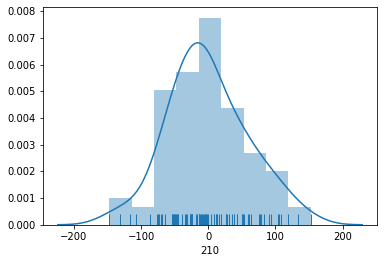

In [50]:
sns.distplot(res, rug=True)
print("Risque prédictif LASSO:", np.mean(res**2))
print("Erreur LASSO:", mean_absolute_error(y_test2, predlasso))

## Q.14 : Variables sélectionnés par le LASSO

In [51]:
lasso = np.nonzero(reg.coef_)[0].tolist()
forward = features_selected[:8]

In [52]:
print("Coefficients non nuls selectionnés par le LASSO :", lasso)
print("Nb variables LASSO :", len(lasso))
print("Variables forward", forward)

Coefficients non nuls selectionnés par le LASSO : [13, 17, 30, 43, 53, 58, 59, 77, 79, 112, 117, 123, 127, 129, 130, 131, 135, 146, 159, 167, 168, 172, 174, 208]
Nb variables LASSO : 24
Variables forward [58, 123, 34, 167, 174, 23, 133, 99]


In [53]:
set(lasso) & set(forward)

{58, 123, 167, 174}

On remarque que seulement 4 variables sont en communs entre les méthodes de forward et de Lasso. Ceci peut être expliqué par le choix du alpha ou le mauvais paramètrage soit du lasso soit du mauvais codage du forward.

## Q.15 : MCO avec LASSO

In [54]:
y = y_train2
X = X_train2.iloc[:, lasso]

model2 = LinearRegression(fit_intercept=True, normalize=False).fit(X,y)
pred2 = model2.predict(X_test.iloc[:, lasso])
res = y_test - pred2

rpred = np.mean(res**2)
print("risque pred = ", rpred)

risque pred =  3892.1519855956344


# Sources

<li>http://statweb.stanford.edu/~owen/courses/305a/Rudyregularization.pdf</li>